## Data Understanding, Cleaning and Preparation

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data Files
Leads = pd.read_csv("Leads.csv")

In [4]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Leads.shape

(9240, 37)

In [7]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Replacing Select with Null
Leads.replace(to_replace = 'Select', value = np.nan, inplace = True) 

## Univariate Analysis

Let's check the value_Counts for all columns and do univariate analysis before dropping columns

In [9]:
Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
Numlist = Leads.dtypes[Leads.dtypes != 'object'].keys().tolist()
Numlist

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
Catlist = Leads.dtypes[Leads.dtypes == 'object'].keys().tolist()
Catlist

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [12]:
Leads['Prospect ID'].nunique()

9240

In [13]:
Leads['Lead Number'].nunique()

9240

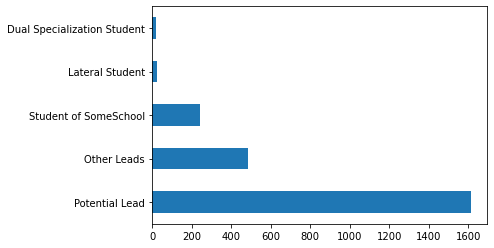

In [14]:
Leads['Lead Profile'].value_counts().plot.barh()
plt.show()

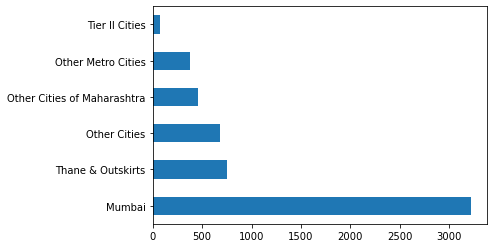

In [15]:
Leads['City'].value_counts().plot.barh()
plt.show()

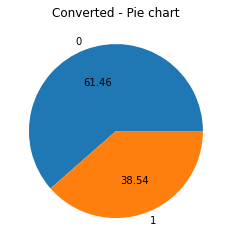

In [16]:
plt.pie(Leads['Converted'].value_counts(), labels = Leads['Converted'].unique().tolist(), autopct="%.2f")
plt.title("Converted - Pie chart")
plt.show()

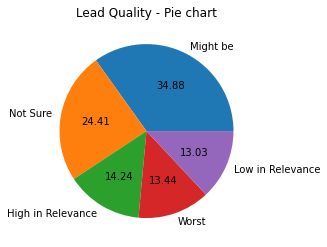

In [17]:
mylabels = ["Might be", "Not Sure", "High in Relevance", "Worst", "Low in Relevance"]
plt.pie(Leads['Lead Quality'].value_counts(), labels = mylabels, autopct="%.2f")
plt.title("Lead Quality - Pie chart")
plt.show() 

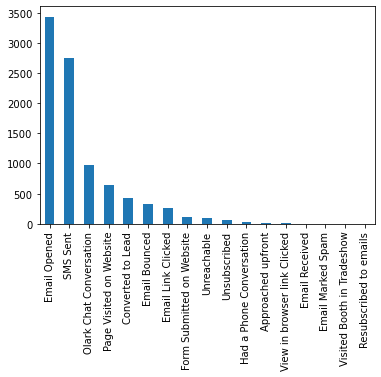

In [18]:
Leads['Last Activity'].value_counts().plot.bar()
plt.show()

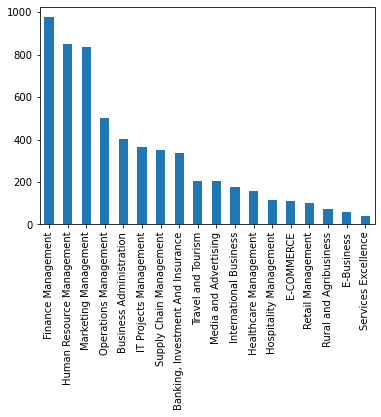

In [19]:
Leads['Specialization'].value_counts().plot.bar()
plt.show()

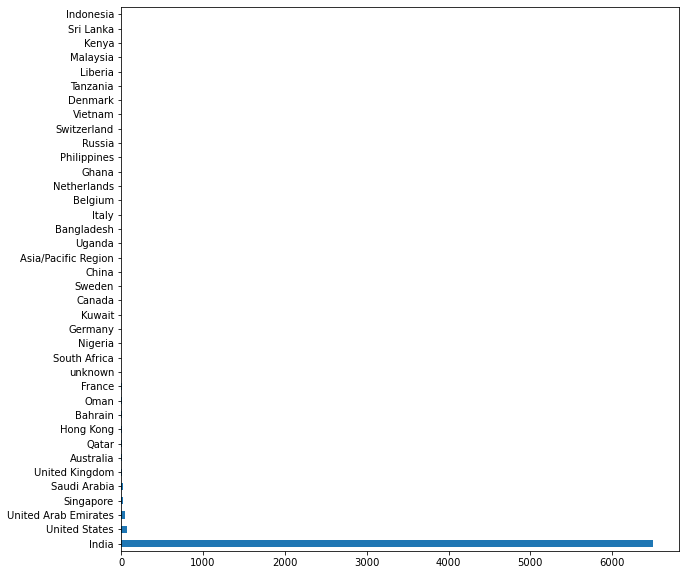

In [20]:
plt.figure(figsize=(10,10))
Leads['Country'].value_counts().plot.barh()
plt.show()

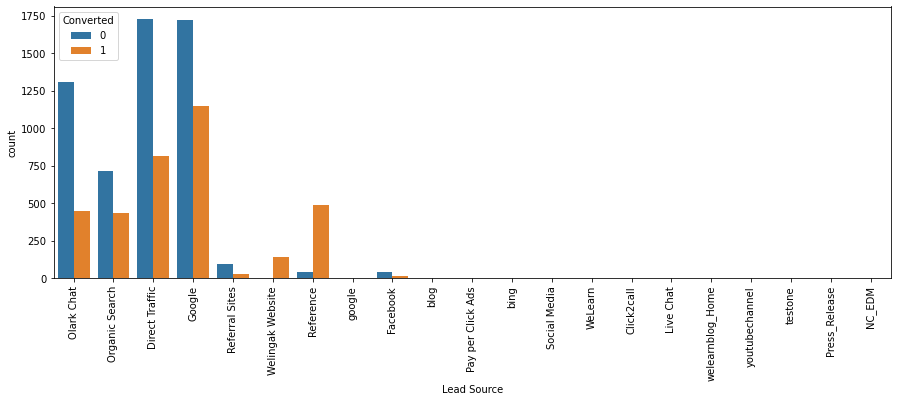

In [21]:
plt.figure(figsize=(15,5))
s1=sns.countplot(Leads["Lead Source"], hue=Leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

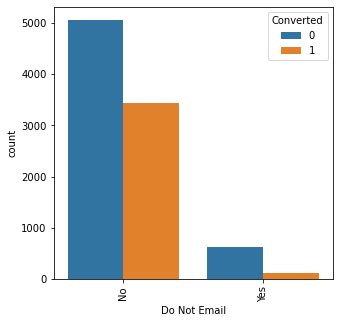

In [22]:
plt.figure(figsize=(5,5))
s1=sns.countplot(Leads["Do Not Email"], hue=Leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

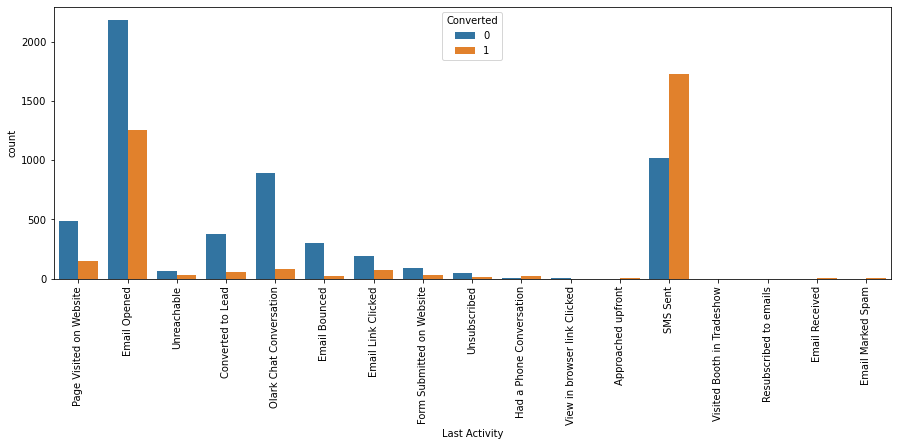

In [23]:
plt.figure(figsize=(15,5))
s1=sns.countplot(Leads['Last Activity'], hue=Leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

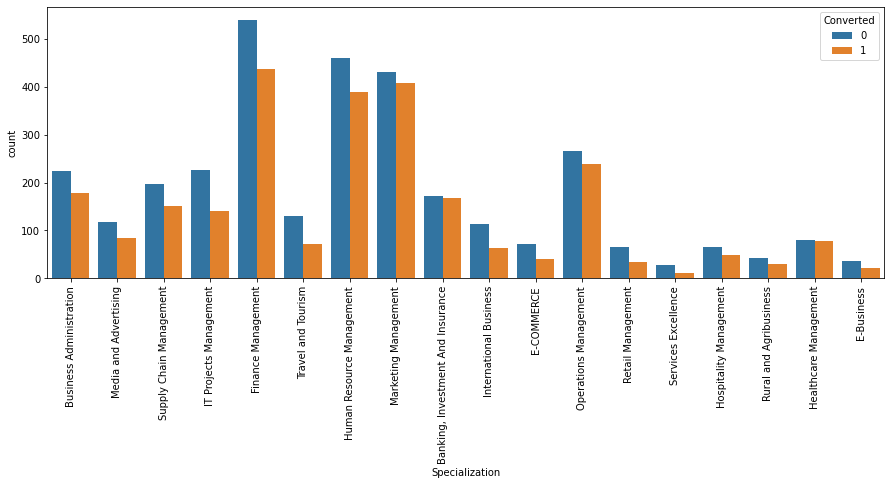

In [24]:
plt.figure(figsize=(15,5))
s1=sns.countplot(Leads['Specialization'], hue=Leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

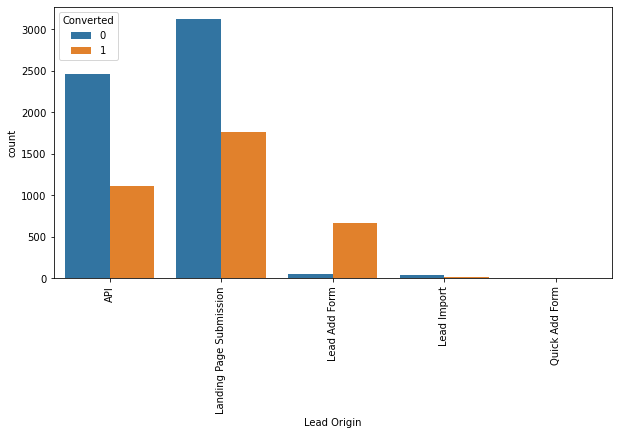

In [25]:
plt.figure(figsize=(10,5))
s1=sns.countplot(Leads['Lead Origin'], hue=Leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

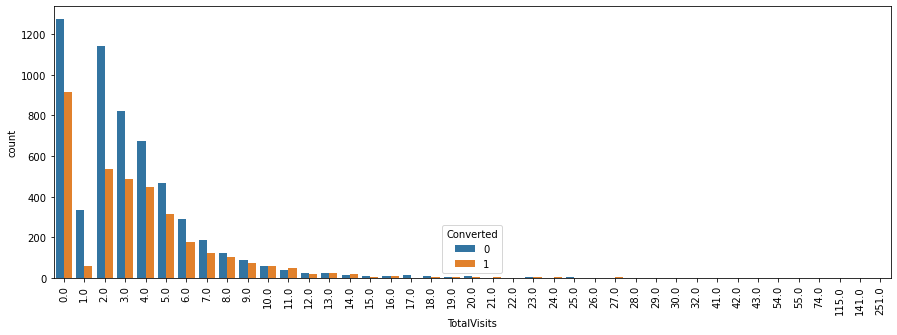

In [26]:
plt.figure(figsize=(15,5))
s1=sns.countplot(Leads['TotalVisits'], hue=Leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
Leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

## Bivariate/Multivariate Analysis

In [28]:
Num = Leads[Numlist]
Cat = Leads[Catlist]

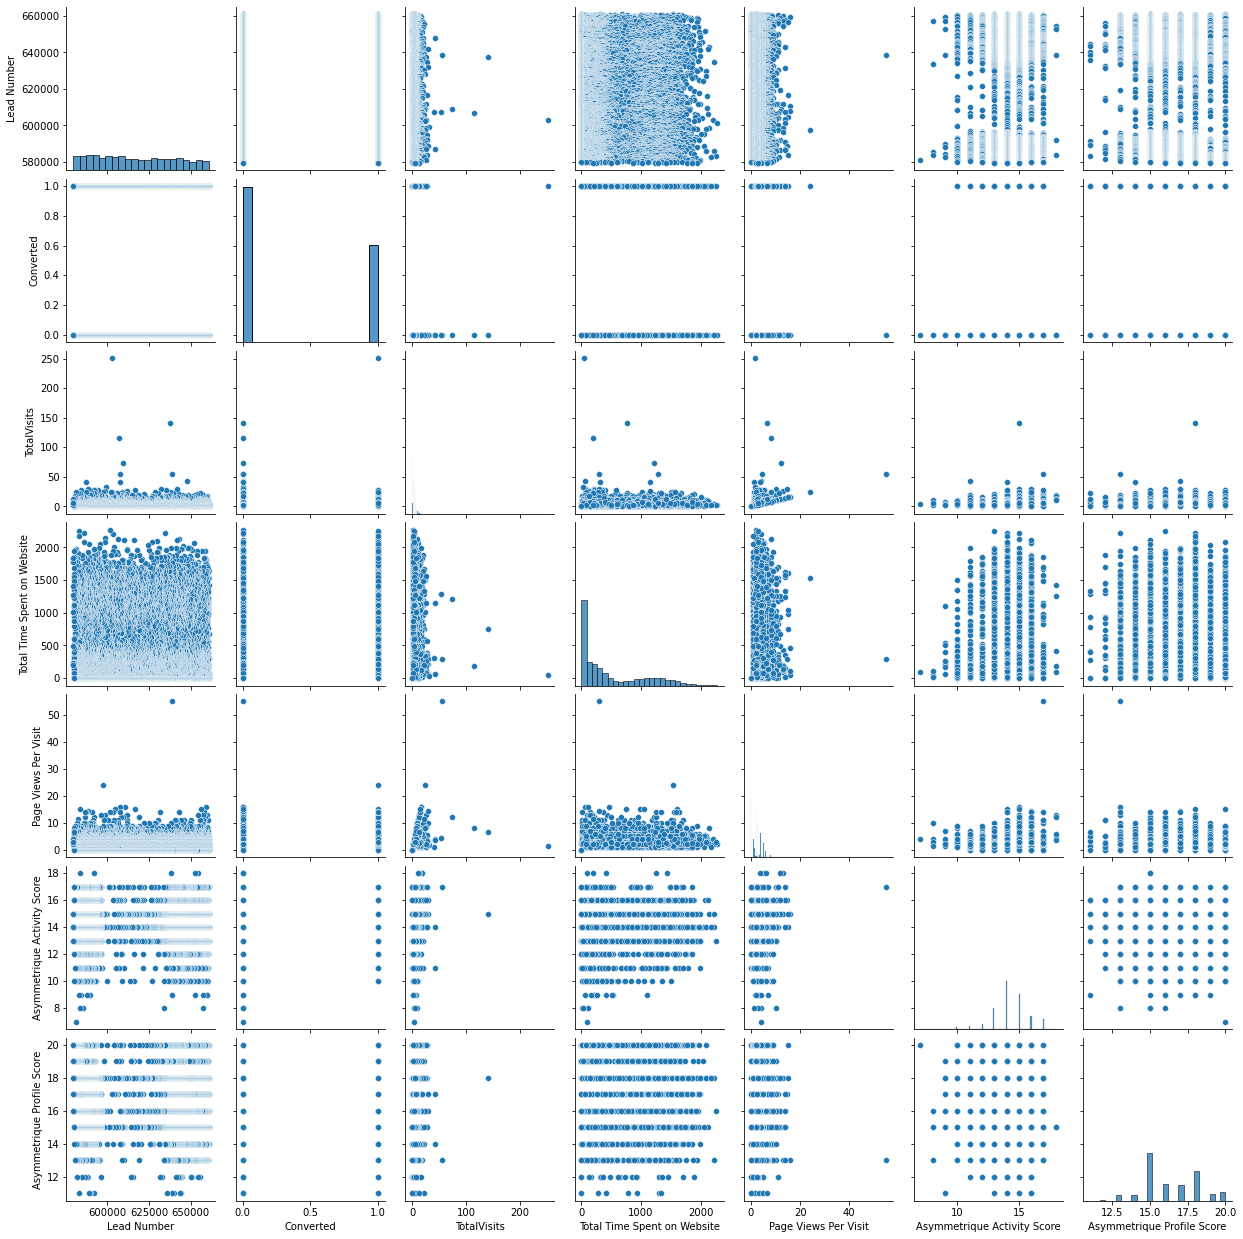

In [29]:
sns.pairplot(Num)
plt.show()

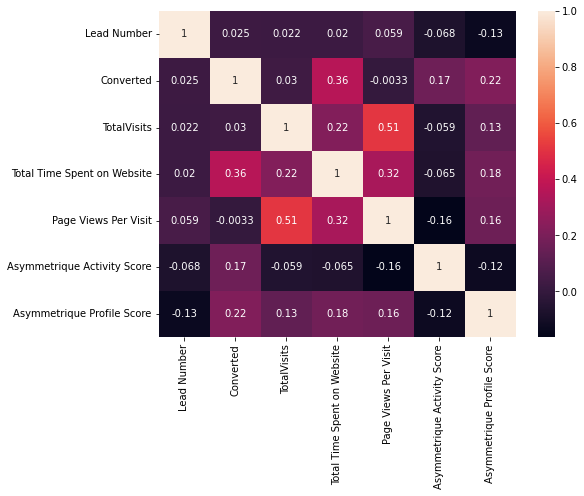

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(Num.corr(), annot = True)
plt.show()

## Outlier Analysis

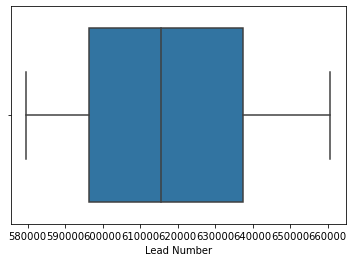

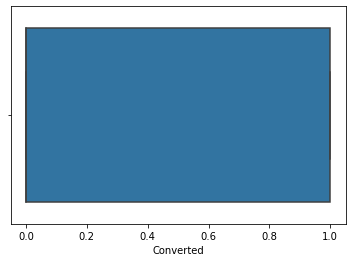

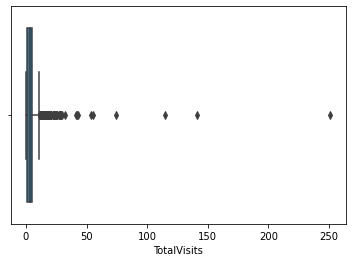

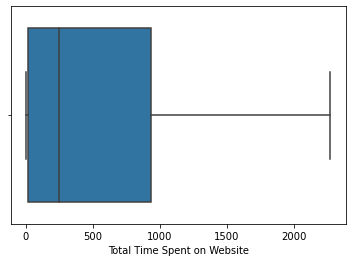

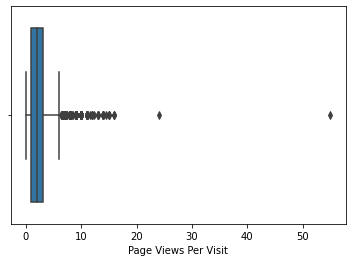

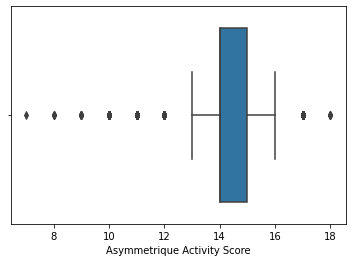

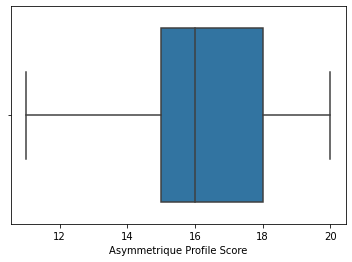

In [31]:
for i in Numlist:
    sns.boxplot(Leads[i])
    plt.show()

## Dropping columns

In [32]:
Leads.isnull().sum()/Leads.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [33]:
(((Leads.isnull().sum())/Leads.shape[0])*100)[(((Leads.isnull().sum())/Leads.shape[0])*100)>28]

Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
dtype: float64

In [34]:
Cols_to_drop = ["Specialization", "How did you hear about X Education",  "Tags", "Lead Quality", "Lead Profile","Lead Source", "City", "Asymmetrique Activity Index",
"Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score", "Country",'Do Not Email', 'Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview','What is your current occupation','What matters most to you in choosing a course','Get updates on DM Content','Prospect ID']

In [35]:
Leads = Leads.drop(Cols_to_drop, axis = 1)
Leads.shape

(9240, 11)

In [36]:
Leads = Leads.dropna(axis = 0)

In [37]:
Leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Through Recommendations                   0
Receive More Updates About Our Courses    0
Update me on Supply Chain Content         0
Last Notable Activity                     0
dtype: int64

In [38]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


## Rescaling features

In [39]:
Leads.columns

Index(['Lead Number', 'Lead Origin', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Last Notable Activity'],
      dtype='object')

In [40]:
Num_cols = ["Lead Number","Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
Cat_cols = ['Lead Origin','Last Activity', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Last Notable Activity']

In [41]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(Leads[Cat_cols], drop_first=True)

# Adding the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

In [42]:
Leads = Leads.drop(Cat_cols, axis = 1)

In [43]:
Leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building and Evaluation 

In [44]:
#Test-Train split
from sklearn.model_selection import train_test_split

In [45]:
# Putting feature variable to X
X = Leads.drop(['Converted'], axis=1)

X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# Putting response variable to y
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
#Rescaling features
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,588794,-0.092900,1.476324,-0.394072,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,607556,0.695064,-0.771066,2.111481,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,640629,0.301082,-0.571257,0.061483,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,643916,2.074000,1.393834,0.517039,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,580141,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train.columns

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Through Recommendations_Yes', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last 

In [51]:
#checking the convert rate
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

38.02043282434362

In [52]:
import statsmodels.api as sm

In [53]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.0
Date:                Tue, 21 Mar 2023   Deviance:                       5676.0
Time:                        19:52:37   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3540
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 15.9960   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Number                                         8.034e-06   1.49e-06      5.384      0.000    5.11e-06     1.1e-05
TotalVisits                                            0.1597      0.051      3.163      0.002       0.061       0.259
Total Time Spent on Website                            1.0393      0.036     28.500      0.000       0.968       1.111
Page Views Per Visit                                  -0.2515      0.048     -5.228      0.000      -0.346      -0.157
Lead Origin_Landing Page Submission                   -0.4088      0.079     -5.151      0.000      -0.564      -0.253
Lead Origin_Lead Add Form                              3.6370      0.211     17.254      0.000       3.224       4.050
Lead Origin_Lead Import                                0.4957      0.425      1.166      0.244      -0.338       1.329
Last Activity_Converted to Lead                      -24.8191   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Email Bounced                          -25.7112   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Email Link Clicked                     -23.9338   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Email Marked Spam                       -0.1920   3.41e+04  -5.63e-06      1.000   -6.68e+04    6.68e+04
Last Activity_Email Opened                           -23.5021   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Email Received                          -0.9731   5.28e+04  -1.84e-05      1.000   -1.04e+05    1.04e+05
Last Activity_Form Submitted on Website              -23.9254   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Had a Phone Conversation               -22.8051   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Olark Chat Conversation                -24.8715   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Page Visited on Website                -24.2729   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Resubscribed to emails                   1.1292   3.41e+04   3.31e-05      1.000   -6.68e+04    6.68e+04
Last Activity_SMS Sent                               -23.3716   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Unreachable                            -24.5214   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_Unsubscribed                           -24.0362   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Activity_View in browser link Clicked           -23.8814   2.16e+04     -0.001      0.999   -4.24e+04  

In [54]:
##Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True,  True,  True, False,  True,
       False, False, False])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False, 16),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', False, 12),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', False, 4),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Resubscribed to emails', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 6),
 ('Last Activity_Unsubscribed', False, 3),
 ('Last Activity_View in browser link Clicked', False, 10),
 ('La

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Lead Import',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Through Recommendations_Yes',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.1
Date:                Tue, 21 Mar 2023   Deviance:                       5748.2
Time:                        19:52:38   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3467
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.1800      0.950     -4.402      0.000      -6.041      -2.319
Lead Number                                    7.091e-06   1.46e-06      4.849      0.000    4.22e-06    9.96e-06
TotalVisits                                       0.0587      0.031      1.911      0.056      -0.001       0.119
Total Time Spent on Website                       1.0082      0.035     28.494      0.000       0.939       1.078
Lead Origin_Landing Page Submission              -0.5524      0.074     -7.452      0.000      -0.698      -0.407
Lead Origin_Lead Add Form                         3.7377      0.209     17.882      0.000       3.328       4.147
Last Activity_Converted to Lead                  -0.9179      0.350     -2.623      0.009      -1.604      -0.232
Last Activity_Email Bounced                      -1.8118      0.495     -3.657      0.000      -2.783      -0.841
Last Activity_Email Link Clicked                 -0.1043      0.448     -0.233      0.816      -0.983       0.775
Last Activity_Email Opened                        0.3122      0.316      0.987      0.324      -0.308       0.932
Last Activity_Form Submitted on Website          -0.0839      0.411     -0.204      0.838      -0.889       0.721
Last Activity_Olark Chat Conversation            -1.0282      0.341     -3.016      0.003      -1.696      -0.360
Last Activity_Page Visited on Website            -0.4806      0.350     -1.374      0.169      -1.166       0.205
Last Activity_SMS Sent                            0.4339      0.319      1.362      0.173      -0.190       1.058
Last Notable Activity_Email Bounced              -0.1713      0.728     -0.235      0.814      -1.598       1.255
Last Notable Activity_Email Link Clicked         -1.1547      0.579     -1.993      0.046      -2.290      -0.019
Last Notable Activity_Email Opened               -1.0547      0.420     -2.511      0.012      -1.878      -0.231
Last Notable Activity_Modified                   -1.2823      0.399     -3.217      0.001      -2.063      -0.501
Last Notable Activity_Olark Chat Conversation    -0.8864      0.517     -1.714      0.086      -1.900       0.127
Last Notable Activity_Page Visited on Website    -0.7630      0.476     -1.603      0.109      -1.696       0.170
Last Notable Activity_SMS Sent                    0.2035      0.422      0.482      0.630      -0.624       1.031
=================================================================================================================
"""

In [61]:
X_test = X_test.drop(['Lead Origin_Lead Import', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Through Recommendations_Yes', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Last Notable Activity_View in browser link Clicked','Last Notable Activity_Olark Chat Conversation','Last Activity_Email Opened'], 1)
X_train = X_train.drop(['Lead Origin_Lead Import', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Through Recommendations_Yes', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Last Notable Activity_View in browser link Clicked','Last Notable Activity_Olark Chat Conversation','Last Activity_Email Opened'], 1)


In [62]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.7
Date:                Tue, 21 Mar 2023   Deviance:                       5735.3
Time:                        19:52:38   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3480
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.4576      0.917     -5.951      0.000      -7.255      -3.660
Lead Number                            7.876e-06   1.47e-06      5.368      0.000       5e-06    1.08e-05
TotalVisits                               0.1569      0.050      3.165      0.002       0.060       0.254
Total Time Spent on Website               1.0400      0.036     28.770      0.000       0.969       1.111
Page Views Per Visit                     -0.2467      0.047     -5.212      0.000      -0.339      -0.154
Lead Origin_Landing Page Submission      -0.4185      0.079     -5.325      0.000      -0.572      -0.264
Lead Origin_Lead Add Form                 3.6229      0.210     17.248      0.000       3.211       4.035
Last Activity_Converted to Lead          -1.1780      0.214     -5.497      0.000      -1.598      -0.758
Last Activity_Email Bounced              -1.7884      0.304     -5.891      0.000      -2.383      -1.193
Last Activity_Olark Chat Conversation    -1.2402      0.165     -7.524      0.000      -1.563      -0.917
Last Activity_Page Visited on Website    -0.6306      0.145     -4.352      0.000      -0.915      -0.347
Last Activity_SMS Sent                    0.2753      0.156      1.762      0.078      -0.031       0.582
Last Notable Activity_Modified           -0.3753      0.098     -3.819      0.000      -0.568      -0.183
Last Notable Activity_SMS Sent            1.1217      0.174      6.461      0.000       0.781       1.462
=========================================================================================================
"""

In [63]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.855237
5520    0.090729
1962    0.183533
1566    0.699059
9170    0.161621
5097    0.197277
8954    0.514122
309     0.252882
5519    0.491691
1050    0.596487
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8552367 , 0.09072859, 0.1835328 , 0.69905928, 0.16162123,
       0.19727738, 0.51412154, 0.25288215, 0.49169104, 0.59648704])

In [65]:
## Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.855237,7962
1,0,0.090729,5520
2,0,0.183533,1962
3,1,0.699059,1566
4,0,0.161621,9170


In [66]:
y_train_pred_final['Lead_Score'] = round(y_train_pred_final.Converted_Prob*100)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Lead_Score
0,0,0.855237,7962,86.0
1,0,0.090729,5520,9.0
2,0,0.183533,1962,18.0
3,1,0.699059,1566,70.0
4,0,0.161621,9170,16.0


In [67]:
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 65 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Lead_Score,Predicted
0,0,0.855237,7962,86.0,1
1,0,0.090729,5520,9.0,0
2,0,0.183533,1962,18.0,0
3,1,0.699059,1566,70.0,1
4,0,0.161621,9170,16.0,0


In [68]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3704  249]
 [1204 1215]]


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7719711236660389


## Checking VIFs

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,7.24
12,Last Notable Activity_SMS Sent,7.08
0,Lead Number,4.68
4,Lead Origin_Landing Page Submission,3.21
11,Last Notable Activity_Modified,3.05
8,Last Activity_Olark Chat Conversation,1.72
3,Page Views Per Visit,1.69
1,TotalVisits,1.40
6,Last Activity_Converted to Lead,1.36
5,Lead Origin_Lead Add Form,1.31


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.

In [72]:
Col = X_train.columns
Col

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [73]:
Col = Col.drop('Last Activity_SMS Sent', 1)
Col

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[Col].columns
vif['VIF'] = [variance_inflation_factor(X_train[Col].values, i) for i in range(X_train[Col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,4.68
4,Lead Origin_Landing Page Submission,3.20
10,Last Notable Activity_Modified,2.41
3,Page Views Per Visit,1.69
11,Last Notable Activity_SMS Sent,1.67
8,Last Activity_Olark Chat Conversation,1.57
1,TotalVisits,1.40
5,Lead Origin_Lead Add Form,1.30
6,Last Activity_Converted to Lead,1.26
9,Last Activity_Page Visited on Website,1.21


In [75]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[Col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.2
Date:                Tue, 21 Mar 2023   Deviance:                       5738.4
Time:                        19:52:38   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3477
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.3972      0.916     -5.892      0.000      -7.193      -3.602
Lead Number                            7.784e-06   1.47e-06      5.311      0.000    4.91e-06    1.07e-05
TotalVisits                               0.1594      0.050      3.213      0.001       0.062       0.257
Total Time Spent on Website               1.0404      0.036     28.786      0.000       0.970       1.111
Page Views Per Visit                     -0.2474      0.047     -5.229      0.000      -0.340      -0.155
Lead Origin_Landing Page Submission      -0.4154      0.079     -5.290      0.000      -0.569      -0.262
Lead Origin_Lead Add Form                 3.6364      0.210     17.320      0.000       3.225       4.048
Last Activity_Converted to Lead          -1.2658      0.208     -6.080      0.000      -1.674      -0.858
Last Activity_Email Bounced              -1.8519      0.301     -6.151      0.000      -2.442      -1.262
Last Activity_Olark Chat Conversation    -1.3054      0.160     -8.136      0.000      -1.620      -0.991
Last Activity_Page Visited on Website    -0.6763      0.142     -4.748      0.000      -0.956      -0.397
Last Notable Activity_Modified           -0.2921      0.086     -3.410      0.001      -0.460      -0.124
Last Notable Activity_SMS Sent            1.3901      0.084     16.616      0.000       1.226       1.554
=========================================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.85562457, 0.09138891, 0.15718673, 0.70114071, 0.16242519,
       0.19776836, 0.5150691 , 0.25361418, 0.49081811, 0.59739021])

In [77]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [78]:
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 65 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Lead_Score,Predicted
0,0,0.855625,7962,86.0,1
1,0,0.091389,5520,9.0,0
2,0,0.157187,1962,18.0,0
3,1,0.701141,1566,70.0,1
4,0,0.162425,9170,16.0,0


In [79]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7719711236660389


In [80]:
## Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5022736668044646

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.9370098659246142

In [83]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.06299013407538578


In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.8299180327868853


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7546862265688672


## Optimal Cutoff

In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.855625,7962,86.0,1,1,1,1,1,1,1,1,1,1,0
1,0,0.091389,5520,9.0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.157187,1962,18.0,0,1,1,0,0,0,0,0,0,0,0
3,1,0.701141,1566,70.0,1,1,1,1,1,1,1,1,1,0,0
4,0,0.162425,9170,16.0,0,1,1,0,0,0,0,0,0,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.553986  0.975610  0.295978
0.2   0.2  0.705273  0.890037  0.592208
0.3   0.3  0.772599  0.819760  0.743739
0.4   0.4  0.800377  0.768086  0.820137
0.5   0.5  0.796296  0.652336  0.884392
0.6   0.6  0.779033  0.546920  0.921073
0.7   0.7  0.761456  0.458454  0.946876
0.8   0.8  0.736347  0.355105  0.969643
0.9   0.9  0.688324  0.195535  0.989881


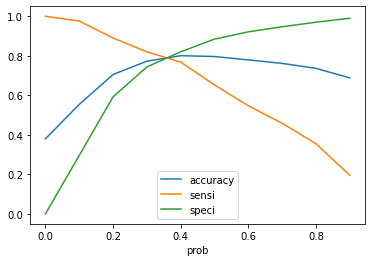

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [89]:
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 38 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.855625,7962,86.0,1,1,1,1,1,1,1,1,1,1,0
1,0,0.091389,5520,9.0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.157187,1962,18.0,0,1,1,0,0,0,0,0,0,0,0
3,1,0.701141,1566,70.0,1,1,1,1,1,1,1,1,1,0,0
4,0,0.162425,9170,16.0,0,1,1,0,0,0,0,0,0,0,0


In [90]:
# Confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion1)

[[3214  739]
 [ 540 1879]]


In [91]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7767672591980157

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.8130533771818872

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18694662281811283


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7177234530175707


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8561534363345764


In [97]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8299180327868853

In [98]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5022736668044646

## Making predictions on the test set

In [99]:
X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
3504,626930,3.0,424,3.00,1,0,0,0,0,0,0,0,0
4050,621198,0.0,0,0.00,0,1,0,0,0,0,1,0,1
7201,594161,2.0,712,2.00,1,0,0,0,0,0,1,0,1
1196,647285,4.0,423,4.00,1,0,0,0,0,0,0,0,0
8219,587146,7.0,247,1.75,1,0,0,0,0,1,0,0,0


In [100]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [101]:
X_test = X_test[Col]
X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
3504,626930,-0.092900,-0.103815,0.289261,1,0,0,0,0,0,0,0
4050,621198,-0.683873,-0.881052,-1.077404,0,1,0,0,0,0,0,1
7201,594161,-0.289891,0.424120,-0.166294,1,0,0,0,0,0,0,1
1196,647285,0.104091,-0.105648,0.744816,1,0,0,0,0,0,0,0
8219,587146,0.695064,-0.428274,-0.280183,1,0,0,0,0,1,0,0


In [102]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [103]:
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred[:10]

3504    0.244770
4050    0.976008
7201    0.654479
1196    0.258950
8219    0.101214
8747    0.165556
9048    0.793859
6524    0.116093
7693    0.385837
8187    0.969004
dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.244770
4050,0.976008
7201,0.654479
1196,0.258950
8219,0.101214


In [106]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [107]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [108]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3504,0.244770
1,1,4050,0.976008
2,0,7201,0.654479
3,0,1196,0.258950
4,1,8219,0.101214


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score'})


In [112]:
y_pred_final["Lead_Score"] = round(y_pred_final["Lead_Score"]*100)

In [113]:
# Rearranging the columns
y_pred_final.loc[:,['Lead Number','Converted','Lead_Score']]


,Lead Number,Converted,Lead_Score
0,3504,0,24.0
1,4050,1,98.0
2,7201,0,65.0
3,1196,0,26.0
4,8219,1,10.0
...,...,...,...
2726,6508,0,38.0
2727,315,0,31.0
2728,3766,0,14.0
2729,8043,1,87.0


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 38 else 0)

In [116]:
y_pred_final.head()

,Converted,Lead Number,Lead_Score,final_predicted
0,0,3504,24.0,0
1,1,4050,98.0,1
2,0,7201,65.0,1
3,0,1196,26.0,0
4,1,8219,10.0,0


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7993409007689491

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1363,  326],
       [ 222,  820]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7869481765834933

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8069863824748372